# **The Method of Analysis´ infulence on EDA**

## Authors Markus Nygren & Oscar Wikström
This notebook contains the code for the EDA for CO2 Emissions by Country. 
Explanations for the code will be provided with markdown cells if applicable. More in depth reasonings and theory can be found in the thesis.

## **What we are measuring written below:**
- Mean value
- Median value 
- normal distribution  
- Relations between columns
- Top 10 highest CO2 Emissions by Country
- Top 10 lowest CO2 Emissions by Country

### **Cleaning methodologies written below:**
- extreme values with max and min values (0,1%  1%  2,5%  5%)
- raw (no cleaning)
- Remove row with empty value (null)
- Replace empty values with the mean value **check this later**
- Normalization

**Metrics for each column:**
 
- 'Year', 'Total', 'Coal', 'Oil', 'Gas','Cement', 'Flaring', 'Other', = Megatonnes 
- per capita = tons


In [39]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import sys
# suppress warnings
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

try:
    dataCo2 = pd.read_csv('CO2.csv')
    dataCo2= pd.DataFrame(dataCo2)
except:
    FileNotFoundError 
    print("data can´t be found")

print(dataCo2) # to see the basic structure of the data


           Country ISO 3166-1 alpha-3  UN M49  Year         Total  \
0      Afghanistan                AFG       4  1750           NaN   
1      Afghanistan                AFG       4  1751           NaN   
2      Afghanistan                AFG       4  1752           NaN   
3      Afghanistan                AFG       4  1753           NaN   
4      Afghanistan                AFG       4  1754           NaN   
...            ...                ...     ...   ...           ...   
61420       Global                WLD     756  2018  36766.912297   
61421       Global                WLD     756  2019  37039.881946   
61422       Global                WLD     756  2020  35007.822458   
61423       Global                WLD     756  2021  36815.680623   
61424       Global                WLD     756  2022  37150.949699   

               Coal           Oil          Gas       Cement     Flaring  \
0               NaN           NaN          NaN     0.000000         NaN   
1               NaN  

In [40]:
# Rename coulmn names to be more readable
dataCo2=dataCo2.rename({"ISO 3166-1 alpha-3": "ISO Code", "Total":"Total Co2 Emission (Mt)", "Per Capita":"Per Capita (t)"},axis=1)
dataCo2 = dataCo2.drop(["UN M49"], axis=1) # This is recommended by the author as the column is not yet reliable.
print(dataCo2.columns,"\n")


Index(['Country', 'ISO Code', 'Year', 'Total Co2 Emission (Mt)', 'Coal', 'Oil',
       'Gas', 'Cement', 'Flaring', 'Other', 'Per Capita (t)'],
      dtype='object') 



In [41]:
dataCo2.describe() # to get some basic information about the dataset


,Year,Total Co2 Emission (Mt),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita (t)
count,61425.000000,23172.000000,22955.000000,21770.000000,21742.000000,23541.000000,21651.000000,1813.000000,17543.000000
mean,1886.000000,153.057634,71.425477,56.566270,24.080376,3.965080,1.789797,10.124879,4.763254
std,78.808425,1376.320553,594.232230,522.758011,252.822435,48.715779,17.301231,37.883406,17.135050
min,1750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1818.000000,0.307776,0.000000,0.095264,0.000000,0.000000,0.000000,0.172812,0.344935
50%,1886.000000,3.037972,0.219840,1.099765,0.000000,0.000000,0.000000,1.112692,1.655755
75%,1954.000000,25.303708,6.014111,8.956724,0.661014,0.436197,0.000000,4.109894,5.670349
max,2022.000000,37150.949699,15222.908123,12377.248495,7922.817236,1692.365347,435.425169,305.386753,781.001509


In [42]:
print("number of nan values per column\n",dataCo2.isna().sum()) # check for nan values.

number of nan values per column
 Country                        0
ISO Code                    1092
Year                           0
Total Co2 Emission (Mt)    38253
Coal                       38470
Oil                        39655
Gas                        39683
Cement                     37884
Flaring                    39774
Other                      59612
Per Capita (t)             43882
dtype: int64


In [43]:
for country in dataCo2["Country"].unique():
    print(country)

Afghanistan
Albania
Algeria
Andorra
Angola
Anguilla
Antarctica
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bonaire, Saint Eustatius and Saba
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cambodia
Canada
Cape Verde
Central African Republic
Chad
Chile
China
Christmas Island
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Côte d'Ivoire
Croatia
Cuba
Curaçao
Cyprus
Czechia
North Korea
Democratic Republic of the Congo
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Ethiopia
Faeroe Islands
Micronesia (Federated States of)
Fiji
Finland
Panama Canal Zone
France
French Polynesia
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Greenland
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
Iraq
Ireland
Iran
Israel
Italy
Jamaica
J

## **The start of analysis without any datacleaning**
**This will be the baseline going forward to compare to**

In [44]:
print(dataCo2.drop(columns=['Year']).mean())

Total Co2 Emission (Mt)    153.057634
Coal                        71.425477
Oil                         56.566270
Gas                         24.080376
Cement                       3.965080
Flaring                      1.789797
Other                       10.124879
Per Capita (t)               4.763254
dtype: float64


In [45]:
print(dataCo2.drop(columns=['Year']).median()) 
# Here we run into the issue with going back in time so much. Many countries didn´t have fully functioning industries back in 1750 so we get zero as median in some cases.

Total Co2 Emission (Mt)    3.037972
Coal                       0.219840
Oil                        1.099765
Gas                        0.000000
Cement                     0.000000
Flaring                    0.000000
Other                      1.112692
Per Capita (t)             1.655755
dtype: float64


In [46]:
print(dataCo2.drop(columns=['Year']).std()) #Standard deviation

Total Co2 Emission (Mt)    1376.320553
Coal                        594.232230
Oil                         522.758011
Gas                         252.822435
Cement                       48.715779
Flaring                      17.301231
Other                        37.883406
Per Capita (t)               17.135050
dtype: float64


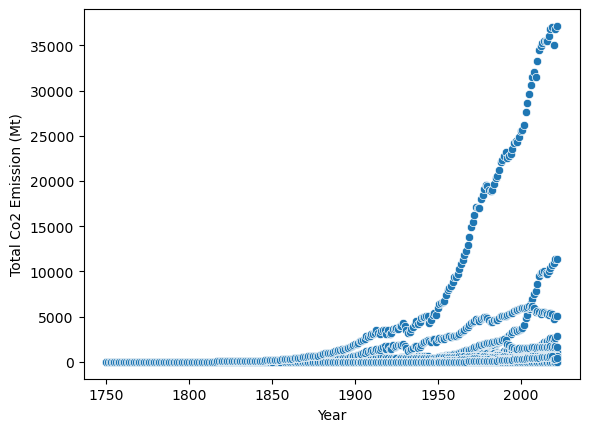

In [47]:
sbn.scatterplot(x=dataCo2['Year'], y=dataCo2['Total Co2 Emission (Mt)'])
plt.show()

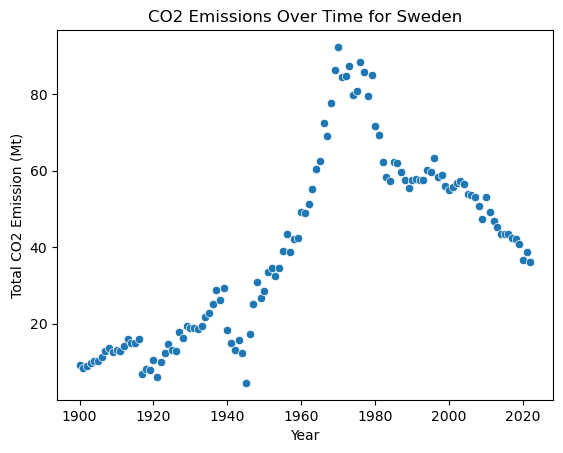

In [48]:
country_name = "Sweden" # Change this line to whatever Country interests you
country_data = dataCo2[dataCo2['Country'] == country_name]

# Filter the data for the time period you're interested in (e.g., after 1900)
filtered_data = country_data[country_data['Year'] >= 1900]

# Plot CO2 emissions over time for the selected country and time period
sbn.scatterplot(x=filtered_data['Year'], y=filtered_data['Total Co2 Emission (Mt)'])
plt.title(f'CO2 Emissions Over Time for {country_name}')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emission (Mt)')
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Total Co2 Emission (Mt)'>

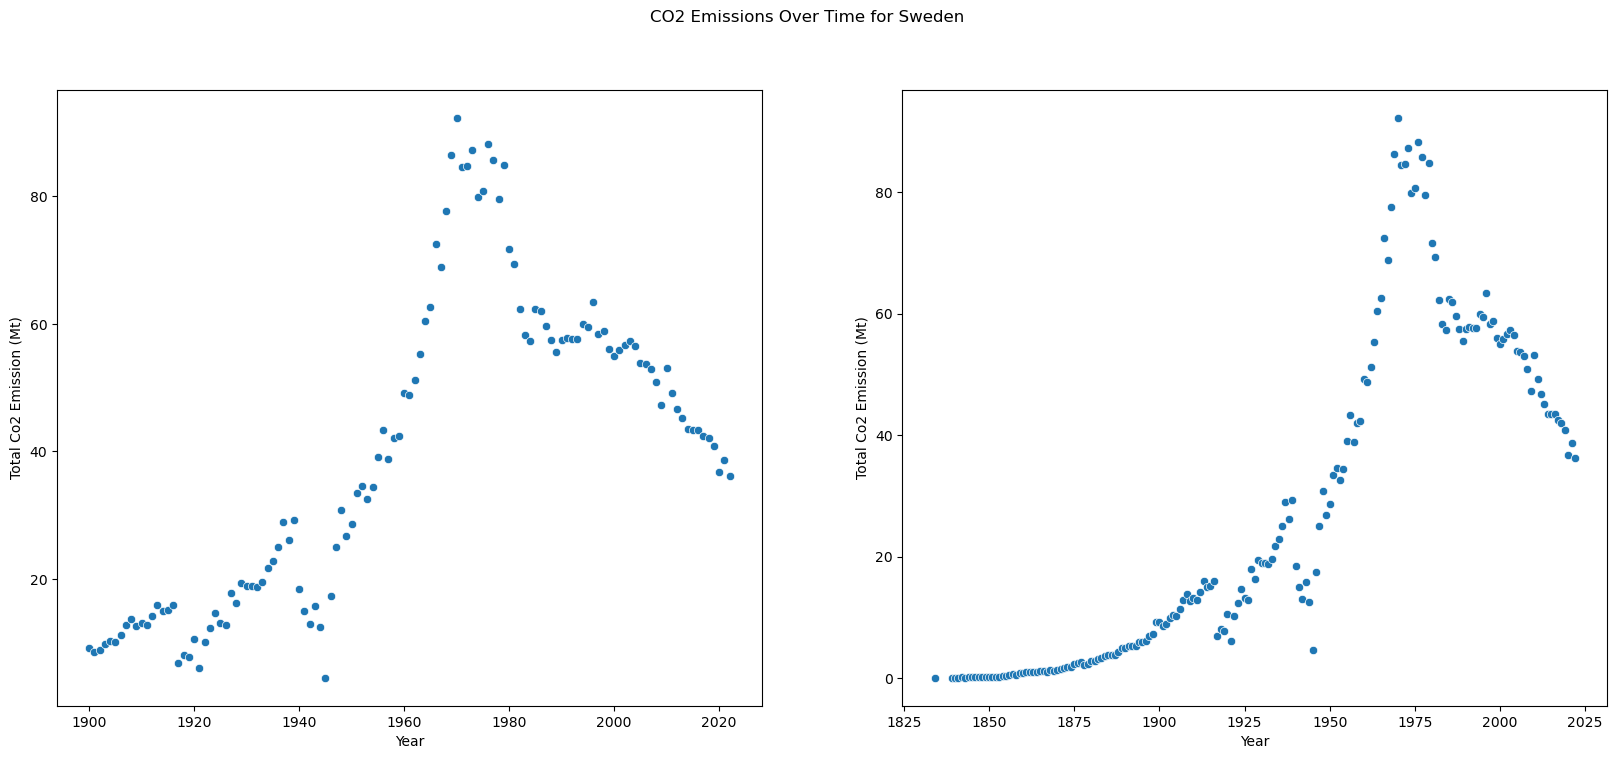

In [49]:
country_name = "Sweden" # Change this line to whatever Country interests you
country_data = dataCo2[dataCo2['Country'] == country_name]

filtered_data = country_data[country_data['Year'] >= 1900]

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(20,8)) # first number is rows with plots and second number is amount of plots per row.
fig.suptitle(f'CO2 Emissions Over Time for {country_name}')
sbn.scatterplot(ax=axes[0], data=filtered_data, x=filtered_data['Year'], y=filtered_data['Total Co2 Emission (Mt)'])
sbn.scatterplot(ax=axes[1], data=dataCo2, x=country_data['Year'], y=country_data['Total Co2 Emission (Mt)'])


<AxesSubplot:xlabel='Year', ylabel='Total Co2 Emission (Mt)'>

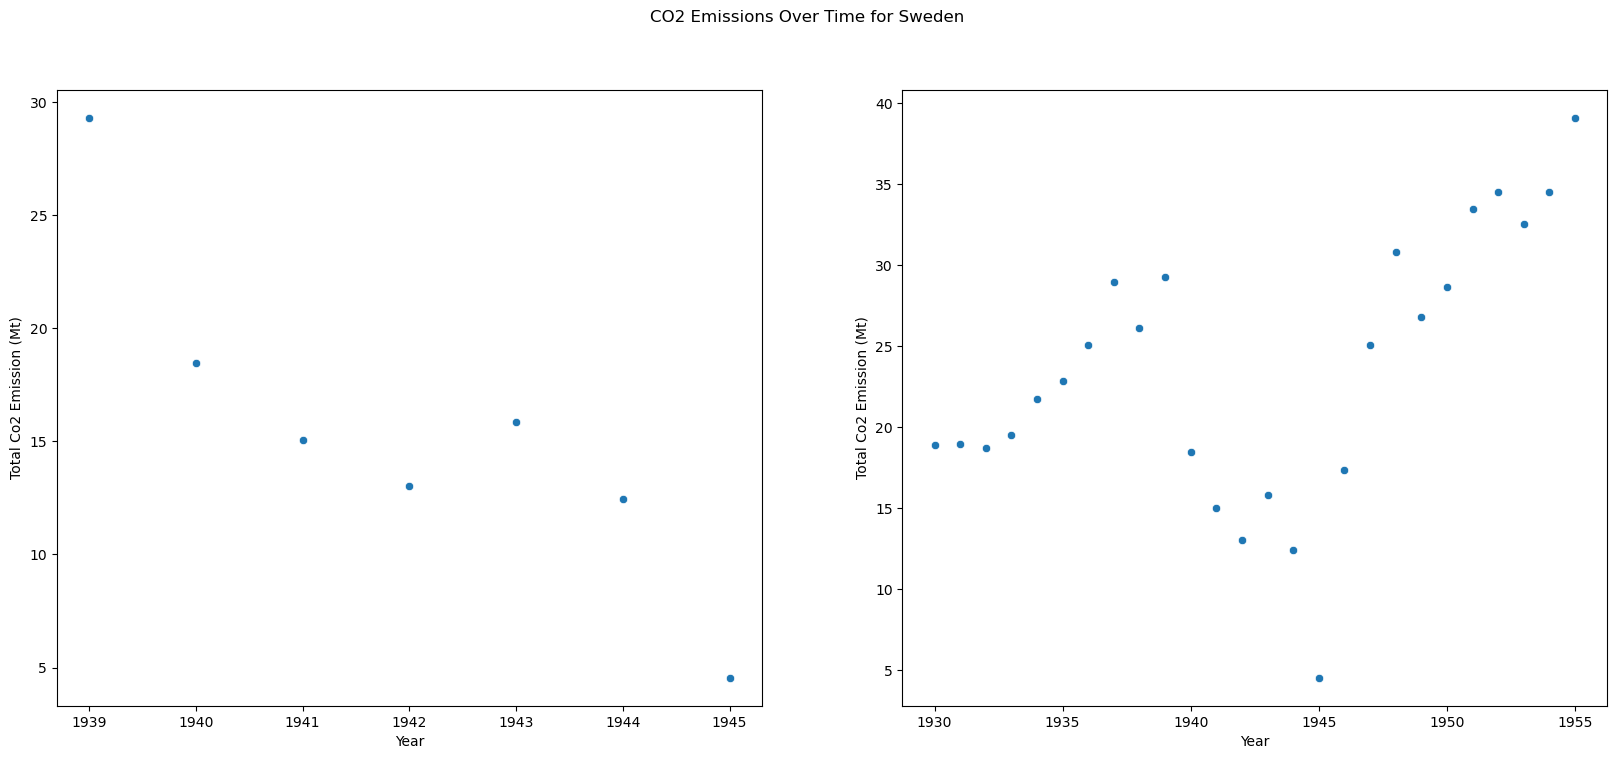

In [50]:
country_name = "Sweden" # Change this line to whatever Country interests you
country_data = dataCo2[dataCo2['Country'] == country_name]

filtered_data = country_data[(country_data['Year'] >=1939) & (country_data['Year'] <=1945)]
filtered_data2 = country_data[(country_data['Year'] >=1930) & (country_data['Year'] <=1955)]

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(20,8)) # first number is rows with plots and second number is amount of plots per row.
fig.suptitle(f'CO2 Emissions Over Time for {country_name} during the world wars')
sbn.scatterplot(ax=axes[0], data=filtered_data, x=filtered_data['Year'], y=filtered_data['Total Co2 Emission (Mt)'])
sbn.scatterplot(ax=axes[1], data=filtered_data2, x=filtered_data2['Year'], y=filtered_data2['Total Co2 Emission (Mt)'])

Text(0.5, 1.0, 'World war 2')

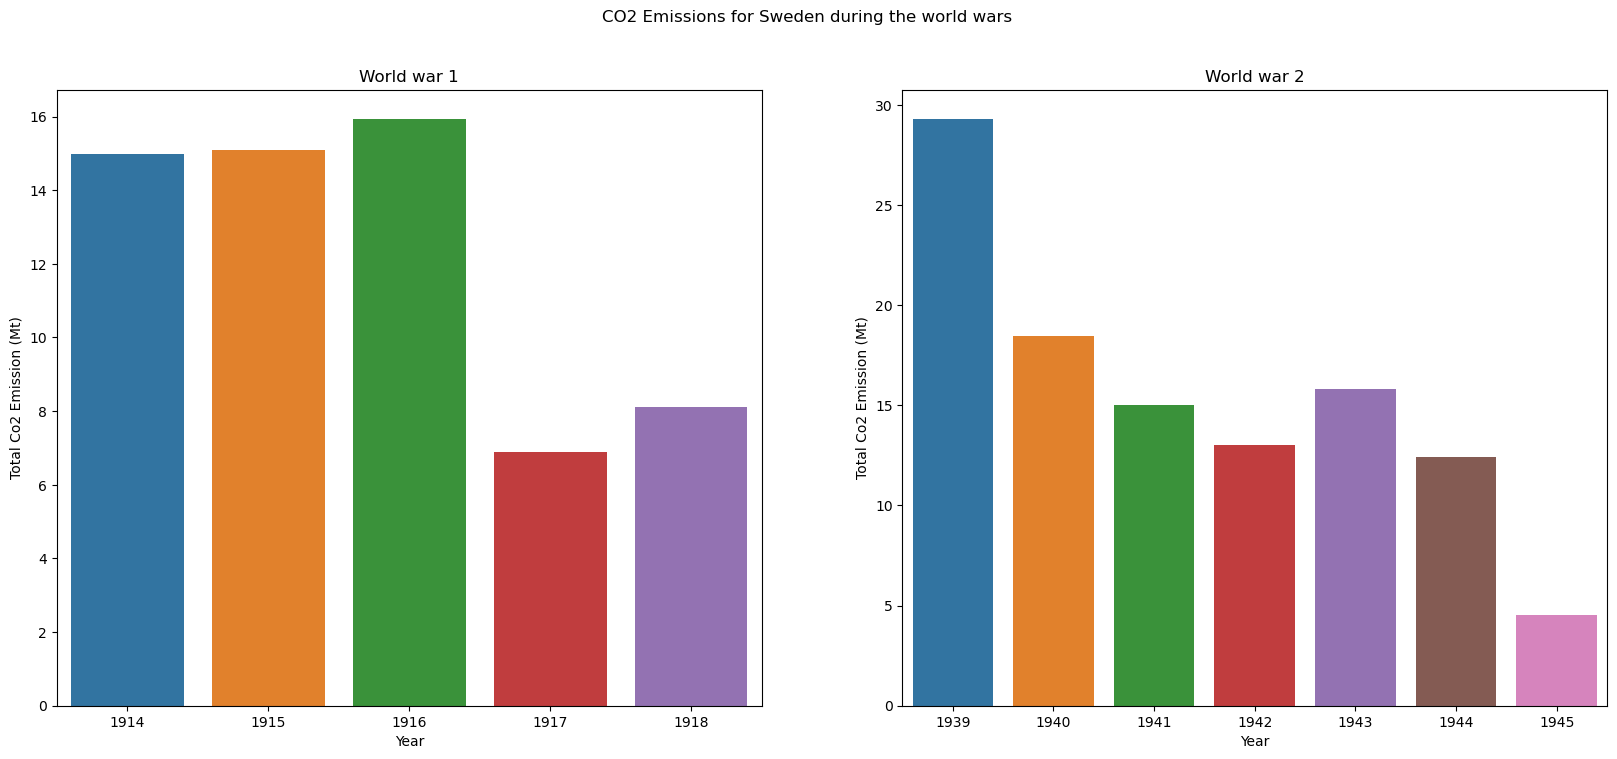

In [51]:
country_name = "Sweden" # Change this line to whatever Country interests you
country_data = dataCo2[dataCo2['Country'] == country_name]

filtered_data = country_data[(country_data['Year'] >=1914) & (country_data['Year'] <=1918)]
filtered_data2 = country_data[(country_data['Year'] >=1939) & (country_data['Year'] <=1945)]

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(20,8)) # first number is rows with plots and second number is amount of plots per row.
fig.suptitle(f'CO2 Emissions for {country_name} during the world wars')
sbn.barplot(ax=axes[0], data=filtered_data, x='Year', y='Total Co2 Emission (Mt)')
axes[0].set_title('World war 1')

# Plotting bar plot for all years available
sbn.barplot(ax=axes[1], data=filtered_data2, x='Year', y='Total Co2 Emission (Mt)')
axes[1].set_title('World war 2')

<AxesSubplot:xlabel='Year', ylabel='Total Co2 Emission (Mt)'>

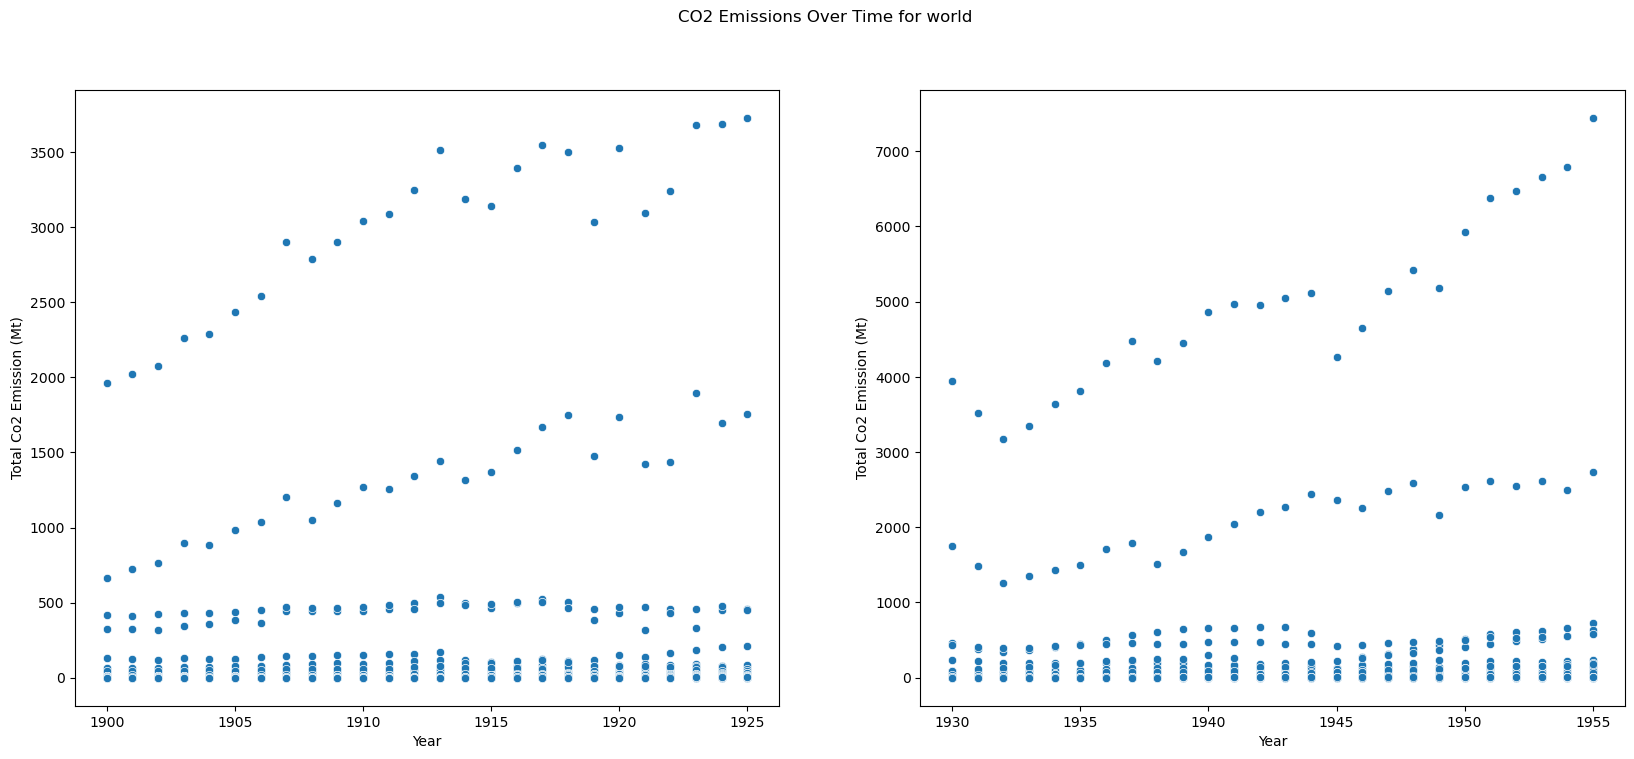

In [52]:
# Might delete this. Decide later. This is probably incorrect as well. Should use the global rows in the dataset
filtered_data = dataCo2[(dataCo2['Year'] >=1900) & (dataCo2['Year'] <=1925)]
filtered_data2 = dataCo2[(dataCo2['Year'] >=1930) & (dataCo2['Year'] <=1955)]

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(20,8)) # first number is rows with plots and second number is amount of plots per row.
fig.suptitle(f'CO2 Emissions Over Time for world')
sbn.scatterplot(ax=axes[0], data=filtered_data, x=filtered_data['Year'], y=filtered_data['Total Co2 Emission (Mt)'])
sbn.scatterplot(ax=axes[1], data=filtered_data2, x=filtered_data2['Year'], y=filtered_data2['Total Co2 Emission (Mt)'])

In [53]:

baseline = dataCo2[(dataCo2['Year'] >=1900)]
filtered_data = dataCo2[(dataCo2['Year'] >=1914) & (dataCo2['Year'] <=1918)]
filtered_data2 = dataCo2[(dataCo2['Year'] >=1939) & (dataCo2['Year'] <=1945)]

# remove year since it´s pointless and to make the output more readable
dataCo2_mean = dataCo2.drop(columns=['Year']).mean()
baseline_mean = baseline.drop(columns=['Year']).mean()
filtered_data_mean = filtered_data.drop(columns=['Year']).mean()
filtered_data2_mean = filtered_data2.drop(columns=['Year']).mean()

# Concatenating the means horizontally
side_by_side = pd.concat([dataCo2_mean, baseline_mean, filtered_data_mean, filtered_data2_mean], axis=1)
side_by_side.columns = ['full dataset', '1900 & forward', 'World war 1', 'World war 2']  

# Printing the concatenated DataFrame
print(side_by_side)
# Here we have a problem. The numbers don´t add up properly
# Let´s investigate

                         full dataset  1900 & forward  World war 1  \
Total Co2 Emission (Mt)    153.057634      176.137163    84.482926   
Coal                        71.425477       79.329887    78.065639   
Oil                         56.566270       64.485328     6.567506   
Gas                         24.080376       27.437179     1.075195   
Cement                       3.965080        5.046328     0.006462   
Flaring                      1.789797        2.039628     0.000000   
Other                       10.124879       10.124879     2.405880   
Per Capita (t)               4.763254        5.046210     2.922866   

                         World war 2  
Total Co2 Emission (Mt)    92.111219  
Coal                       70.644807  
Oil                        18.926888  
Gas                         3.600778  
Cement                      0.594495  
Flaring                     0.000000  
Other                       3.824679  
Per Capita (t)              3.242356  


Text(0.5, 1.0, 'World war 2')

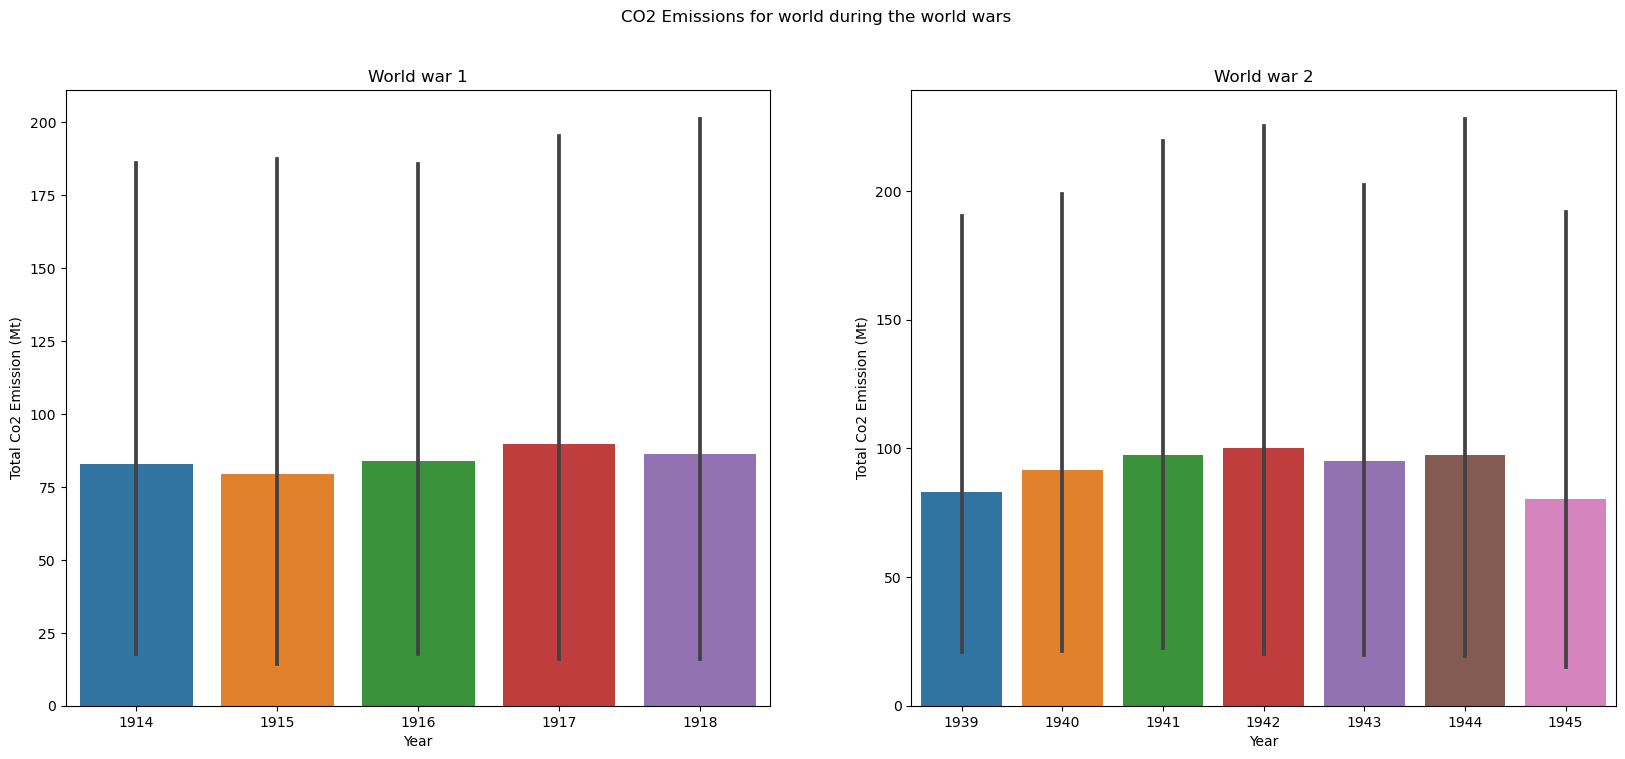

In [54]:
# Let´s start with visualizing the previous result. First the total emission
filtered_data = dataCo2[(dataCo2['Year'] >=1914) & (dataCo2['Year'] <=1918)]
filtered_data2 = dataCo2[(dataCo2['Year'] >=1939) & (dataCo2['Year'] <=1945)]

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(20,8)) # first number is rows with plots and second number is amount of plots per row.
fig.suptitle(f'CO2 Emissions for world during the world wars')
sbn.barplot(ax=axes[0], data=filtered_data, x='Year', y='Total Co2 Emission (Mt)')
axes[0].set_title('World war 1')

# Plotting bar plot for all years available
sbn.barplot(ax=axes[1], data=filtered_data2, x='Year', y='Total Co2 Emission (Mt)')
axes[1].set_title('World war 2')

Text(0.5, 1.0, 'World war 2')

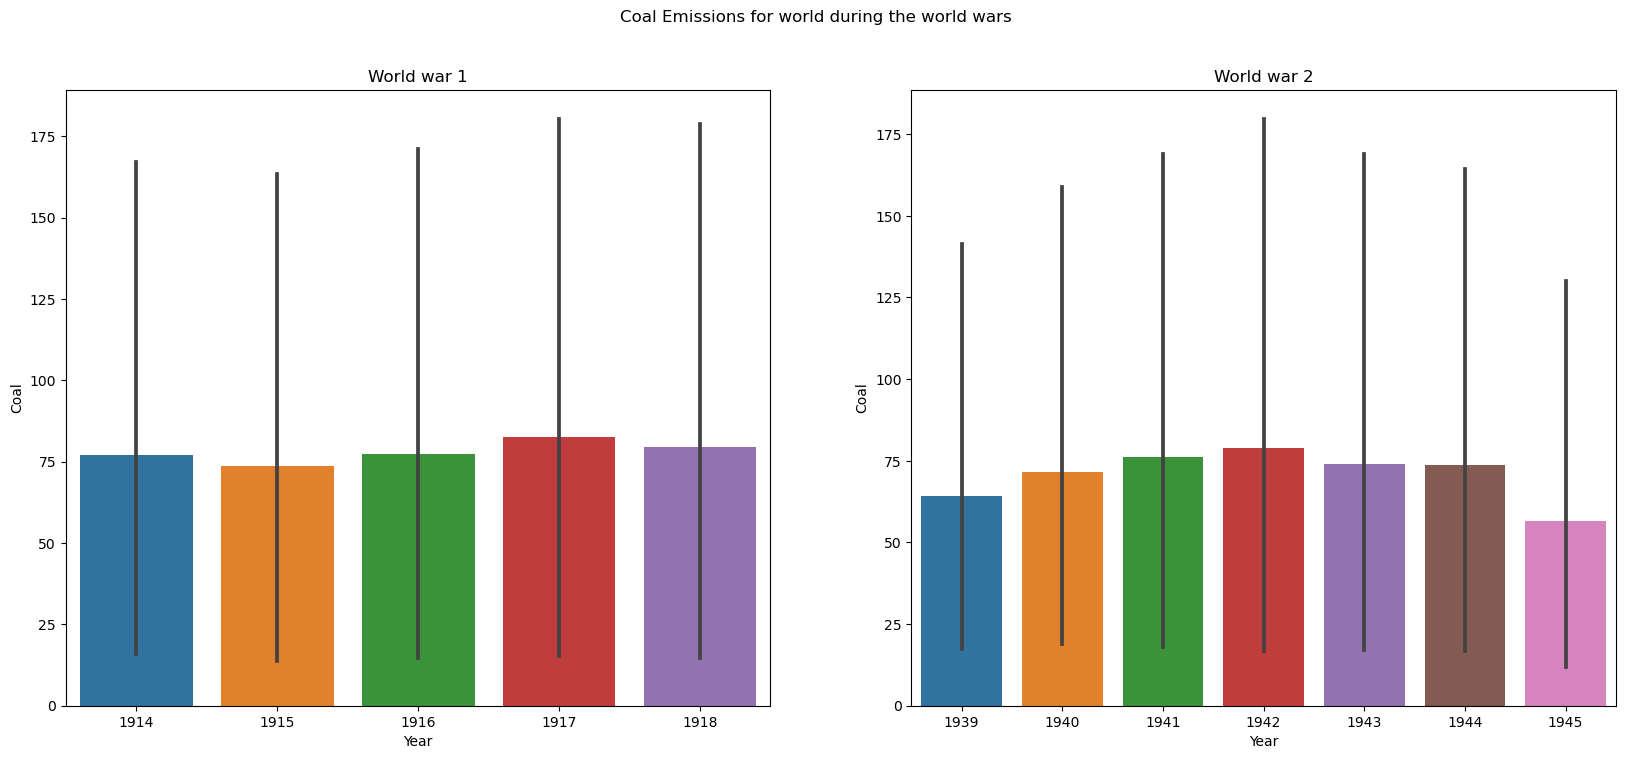

In [55]:
# And now the coal.
filtered_data = dataCo2[(dataCo2['Year'] >=1914) & (dataCo2['Year'] <=1918)]
filtered_data2 = dataCo2[(dataCo2['Year'] >=1939) & (dataCo2['Year'] <=1945)]

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(20,8)) # first number is rows with plots and second number is amount of plots per row.
fig.suptitle(f'Coal Emissions for world during the world wars')
sbn.barplot(ax=axes[0], data=filtered_data, x='Year', y='Coal')
axes[0].set_title('World war 1')

# Plotting bar plot for all years available
sbn.barplot(ax=axes[1], data=filtered_data2, x='Year', y='Coal')
axes[1].set_title('World war 2')

In [56]:
# Now let´s have a look at the missing values
side_by_side = pd.concat([filtered_data.count()+filtered_data.isna().sum(), filtered_data.isna().sum(), filtered_data2.count()+filtered_data2.isna().sum(), filtered_data2.isna().sum()], axis=1)
side_by_side.columns = ['World war 1 full', 'World war 1 nan', 'World war 2 full', 'World war 2 nan']  

# Printing the concatenated DataFrame
print(side_by_side)
# Here is the culprit of the misleading results. It ignores the missing values from the calculation and therefore the average goes up. Instead of deviding with 1155 like the total it´s 330 here.
# print(30922.672382/1155) # This is a more accurate comparison with the total Co2 emission for World war 1. 
# Take the total coal emission and devide it with the number of filled "Total Co2 Emission (Mt)" rows
# print(filtered_data.sum(),"\n")
# print(filtered_data.isna().sum(),"\n") 
# print(filtered_data.count(),"\n")
# print(30922.672382/330)

                         World war 1 full  World war 1 nan  World war 2 full  \
Country                              1125                0              1575   
ISO Code                             1125               20              1575   
Year                                 1125                0              1575   
Total Co2 Emission (Mt)              1125              728              1575   
Coal                                 1125              728              1575   
Oil                                  1125              795              1575   
Gas                                  1125              795              1575   
Cement                               1125              891              1575   
Flaring                              1125              800              1575   
Other                                1125             1120              1575   
Per Capita (t)                       1125             1010              1575   

                         World war 2 na

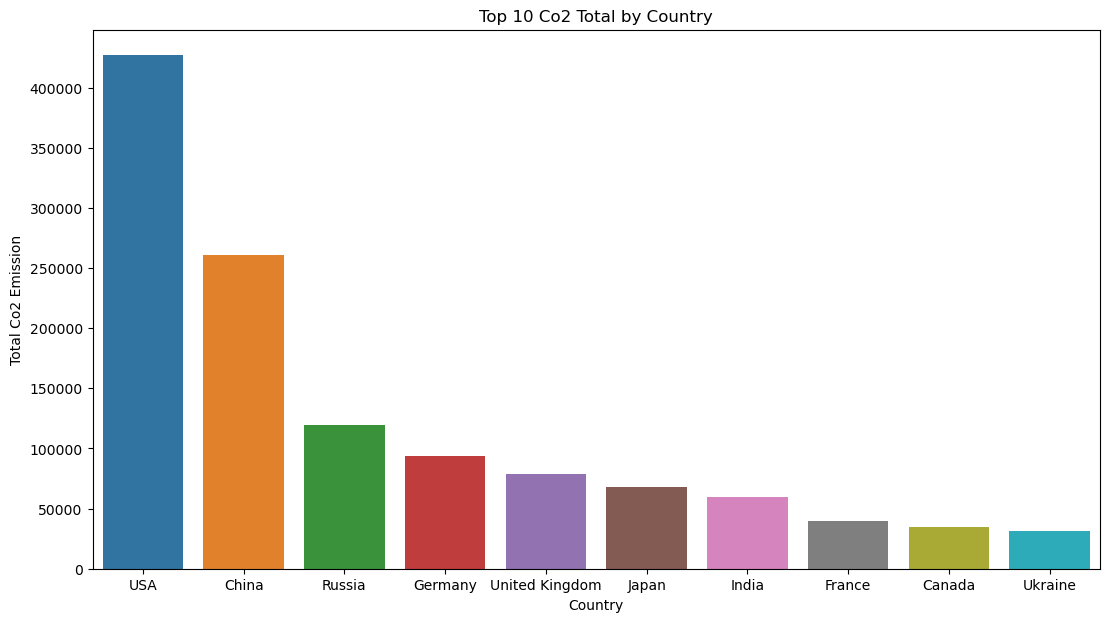

In [91]:
drop_global= dataCo2[(dataCo2["Country"]=="Global")].index 
top_10 = dataCo2.drop(drop_global,inplace=True) # remove global since we want to examine countries and not the world as a whole
top_10 = dataCo2.groupby('Country')['Total Co2 Emission (Mt)'].sum().nlargest(10).reset_index() # Add the total emission per country and select the ten highest values

plt.figure(figsize=(13, 7))
sbn.barplot(data=top_10, x='Country', y='Total Co2 Emission (Mt)')
plt.xlabel('Country')
plt.ylabel('Total Co2 Emission')
plt.title('Top 10 Co2 Total by Country')

plt.show()


## **The start of analysis with all empty values removed**

In [59]:
print("To be continued...")

To be continued...


## **The start of analysis with all empty values substituted with the average value per column**

In [60]:
print("To be continued...")

To be continued...


## **The start of the comparison between the different approaches**

In [61]:
print("To be continued...")

To be continued...
